In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib nbagg

In [2]:
%%javascript
require.config({paths: {
        vis: "http://cdnjs.cloudflare.com/ajax/libs/vis/4.17.0/vis",
        yadage: "https://rawgit.com/cranmer/active_sciencing/yadage/yadage"
    }
});

<IPython.core.display.Javascript object>

In [3]:
import distr
import common
import plots

In [4]:
import models.model_gaussian as model

In [5]:
science_ndata = 20
science_theta_nature = 1.0

In [6]:
def collect_data(phi,ndata, widget = None):
    return model.simulator(science_theta_nature,phi,ndata, widget, delay = True)

In [7]:
def calculate_posterior(prior,data,phi):
    posterior = common.calculate_posterior(
                            prior,data,phi,
                            lnprob_args = model.details_likelihood_settings,
                            n_chainlen = 50
    )
    maximum_a_post = posterior.map(model.details_map_bins)

    print 'Best Theta: ', maximum_a_post
    return posterior, maximum_a_post

In [8]:
def design_next_experiment(prior, ax = None, fig = None, widget = None):
    eig_settings = common.eig_search_settings(model,science_ndata, widget.children[0])
    
    res_gp   = common.design_next_experiment_bayesopt(
                    prior,model.phi_range,eig_settings,
                    n_random_calls = 2,n_totalcalls = 10,
                    ax = ax, fig = fig, widget = widget.children[1]
                )
    res_next_phi = res_gp[0].x[0]
    
    print 'Next Phi: ', res_next_phi
    return res_gp,res_next_phi

In [9]:
widgets, subwidgets = common.overview_widgets(model)
widgets

<IPython.core.display.Javascript object>


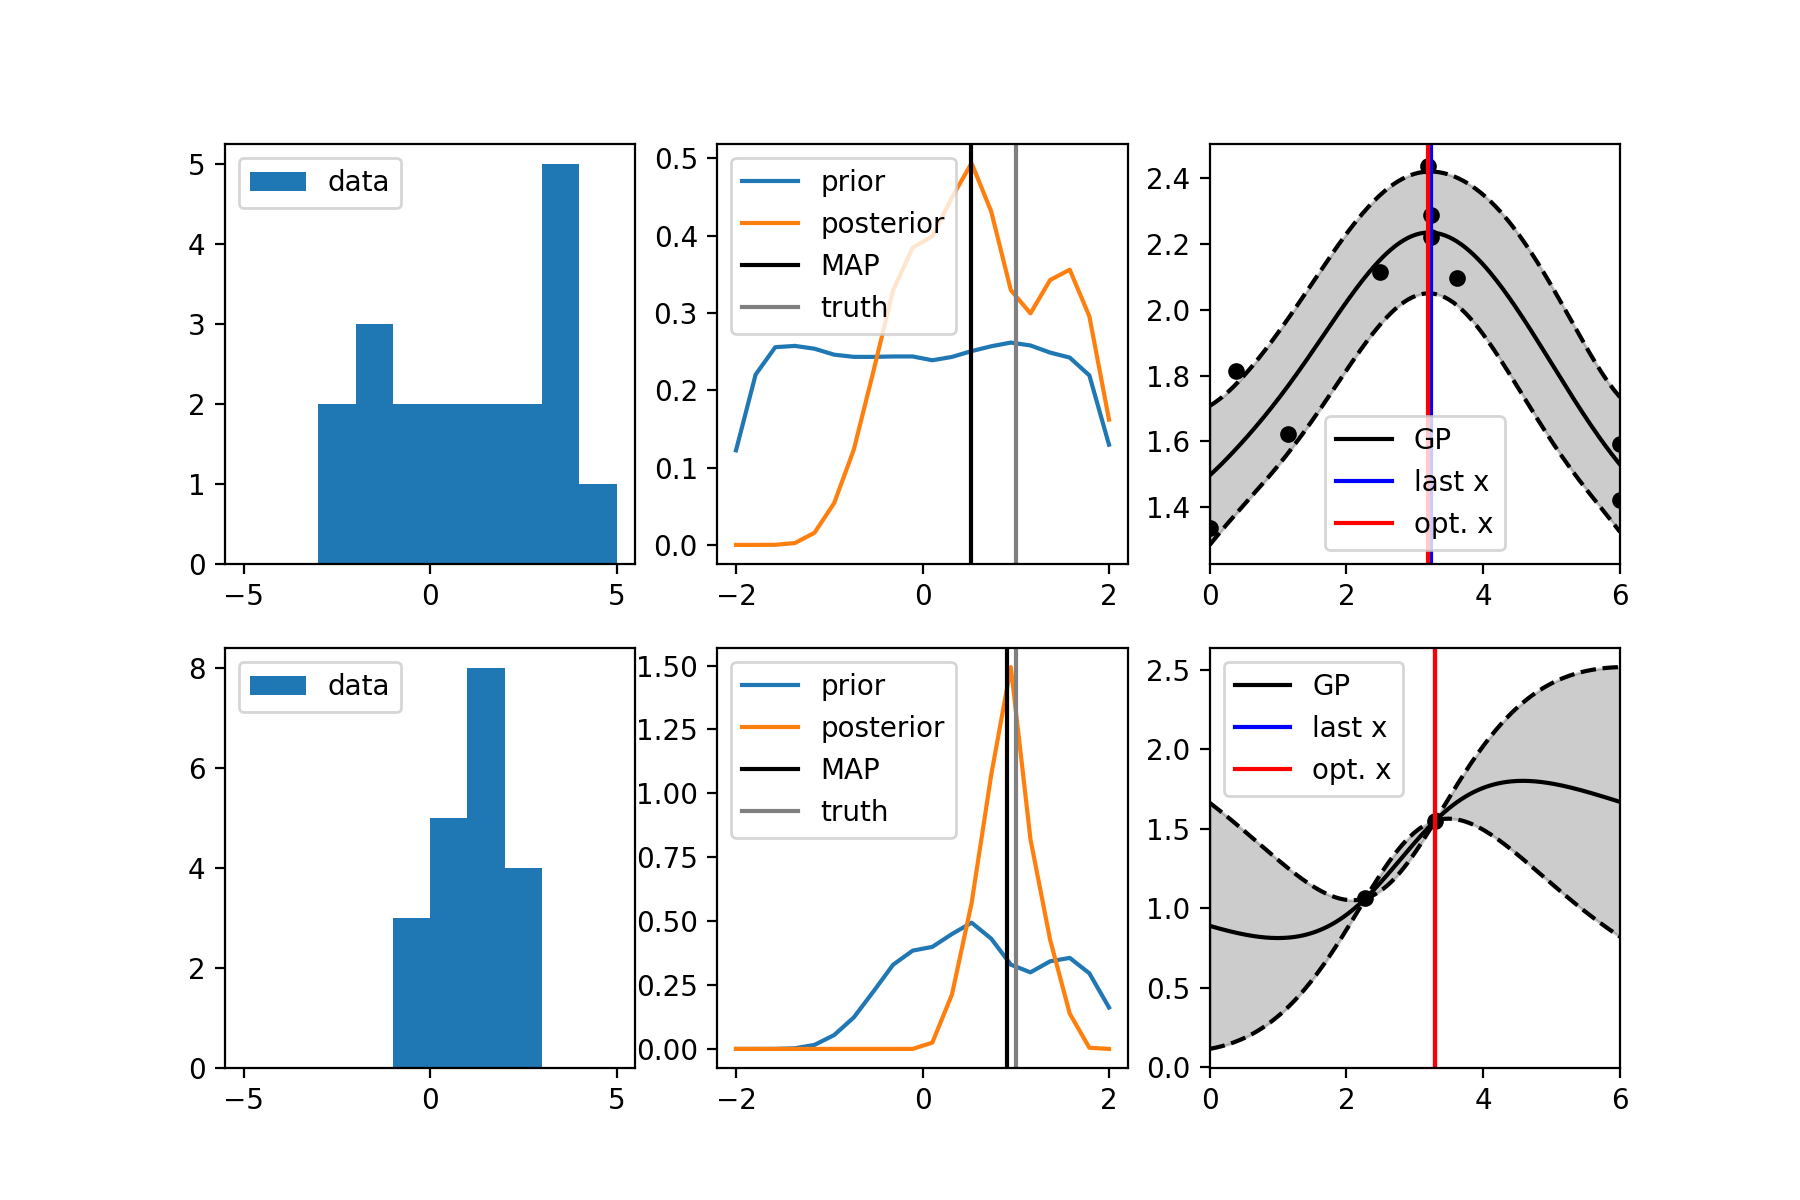

In [10]:
n_science_iterations = 2
fig,axarr = plt.subplots(n_science_iterations,3)
fig.set_size_inches(9,3*n_science_iterations)

# Running the Science Loop

In [ ]:
# initial experimental settings and uninformative prior
loop_phi = -1
loop_prior = distr.Distribution('prior',range = model.theta_range)

In [ ]:
science_history = []
for i in range(n_science_iterations):
        ## 1. Perform Experiment
    subwidgets[0].toggle(0)
    loop_data = collect_data(loop_phi,science_ndata, widget = subwidgets[1])
    plots.plot_data(loop_data,model.data_range, ax = axarr[i][0])
    fig.canvas.draw()

    ## 2. Calculate the Posterior
    subwidgets[0].toggle(1)
    loop_posterior, loop_best_theta = calculate_posterior(loop_prior,loop_data,loop_phi)
    plots.plot_posterior(loop_prior,loop_posterior,loop_best_theta,science_theta_nature, model.theta_range, ax = axarr[i][1])
    fig.canvas.draw()

    ## 3. Design Next Experiment
    subwidgets[0].toggle(2)
    loop_res_gp, loop_next_phi = design_next_experiment(loop_posterior,ax = axarr[i][2], fig = fig, widget = subwidgets[2])

    science_history.append([loop_data,loop_prior,loop_posterior,loop_best_theta,science_theta_nature,loop_res_gp])
    
    ## 5. Update our Prior and experimental settings
    loop_prior = loop_posterior
    loop_phi   = loop_next_phi
    time.sleep(5) # appreciate plots!

Best Theta:  0.517064649267
2017-06-10 10:20:19.450436 EIG via 4 parallel experiments with [theta,phi] 0.517064649267 1.14944721015
2017-06-10 10:20:26.340979 EIG via 4 parallel experiments with [theta,phi] 0.517064649267 0.381675164827
2017-06-10 10:20:33.610352 EIG via 4 parallel experiments with [theta,phi] 0.517064649267 6.0
2017-06-10 10:20:45.467941 EIG via 4 parallel experiments with [theta,phi] 0.517064649267 0.0
2017-06-10 10:20:56.720044 EIG via 4 parallel experiments with [theta,phi] 0.517064649267 6.0


/Users/lukas/Code/active_sciencing/scikit-optimize/skopt/optimizer/optimizer.py:200: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


2017-06-10 10:21:07.793107 EIG via 4 parallel experiments with [theta,phi] 0.517064649267 2.48665885041
2017-06-10 10:21:18.876007 EIG via 4 parallel experiments with [theta,phi] 0.517064649267 3.19033964157
2017-06-10 10:21:34.012070 EIG via 4 parallel experiments with [theta,phi] 0.517064649267 3.61430602286
2017-06-10 10:21:53.526157 EIG via 4 parallel experiments with [theta,phi] 0.517064649267 3.23539577667
2017-06-10 10:22:15.044289 EIG via 4 parallel experiments with [theta,phi] 0.517064649267 3.23687573636
Next Phi:  3.19033964157
Best Theta:  0.909085095003
2017-06-10 10:22:44.782867 EIG via 4 parallel experiments with [theta,phi] 0.909085095003 2.27805542702
2017-06-10 10:23:05.735921 EIG via 4 parallel experiments with [theta,phi] 0.909085095003 3.29915185757
2017-06-10 10:23:29.662936 EIG via 4 parallel experiments with [theta,phi] 0.909085095003 3.47298676184
